# Problem Set 3 - Finding planets outside the solar system

**Total points:** 30

**Due:** Friday February 24th 7pm CET

**Format:** IPython Notebook or python program

## Part 1 (15 points)

In [70]:
import os
import math
import numpy as np
from os.path import basename
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

datadir = 'data/'

time,v,e,z=np.loadtxt('UID_0113357_RVC_001.tbl.txt',unpack=True)

period=np.linspace(1, 100, 10000)#get 10000 period
len = []#l is a list of string length
#loop in period,to get 10000 different numbers of string length.
for i in period:
    phase=(time%i)/i
    v = v[np.argsort(phase)] 
    phase.sort()
    a= np.sum(np.sqrt(np.diff(v)**2+np.diff(phase)**2))
    len.append(a)
#print(len)   
print(min(len), (len.index(min(len))-1)*0.01)
per=(len.index(min(len))-1)*0.01

9545.300574943081 55.01


In [69]:
x = [1,5,3]
z = np.array([2,10,6])
#z = z[np.argsort(x)]

z.sort()
print(z)

[ 2  6 10]


<ErrorbarContainer object of 3 artists>

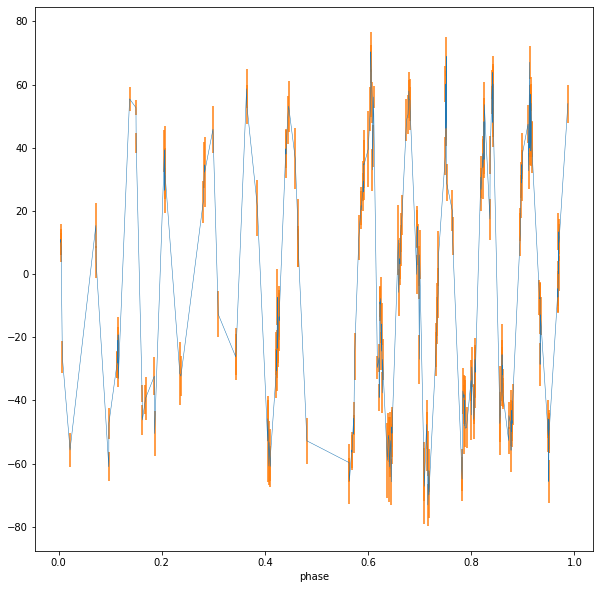

In [71]:
#time is column 1,v is radial velocity, e is uncertainty
time,v,e,z=np.loadtxt('UID_0113357_RVC_001.tbl.txt',unpack=True)
phasenew = (time % per)/per
plt.figure(figsize=(10,10))
v = v[np.argsort(phasenew)] 
phasenew.sort()
plt.plot(phasenew,v,linewidth=0.5)
plt.xlabel('phase')

plt.errorbar(phasenew,v, yerr=e,fmt='none')



<ErrorbarContainer object of 3 artists>

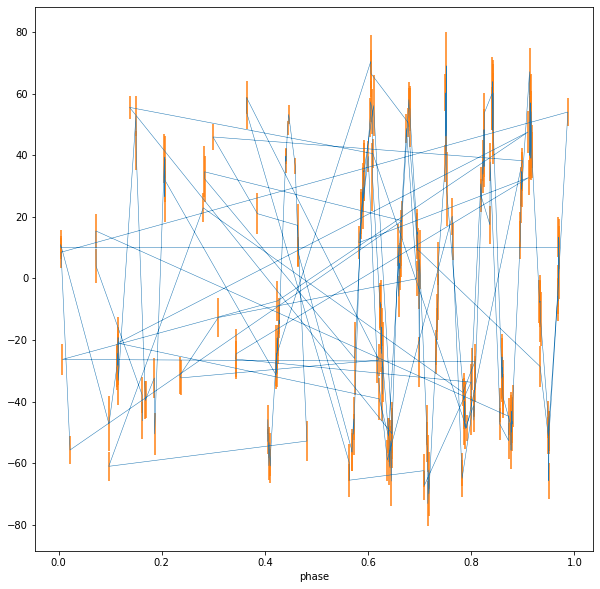

In [72]:
#time is column 1,v is radial velocity, e is uncertainty
time,v,e,z=np.loadtxt('UID_0113357_RVC_001.tbl.txt',unpack=True)
phasenew = (time % per)/per
plt.figure(figsize=(10,10))

plt.plot(phasenew,v,linewidth=0.5)
plt.xlabel('phase')

plt.errorbar(phasenew,v, yerr=e,fmt='none')




array([ 1.06930693])

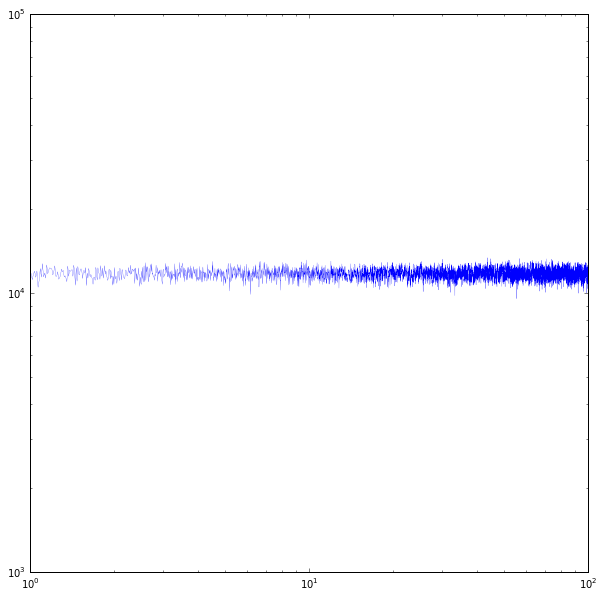

In [3]:
plt.figure(figsize=(10,10))
plt.loglog(period,l,linewidth=0.2)
#find the period of first minimum
#the reason why should find the fist one is that the first one means shortest period
np.array(l)#transfer list to np array
period[l==np.min(l[1:100])]#the first minimum appears between 1 and 2 according to the picture below

<Container object of 3 artists>

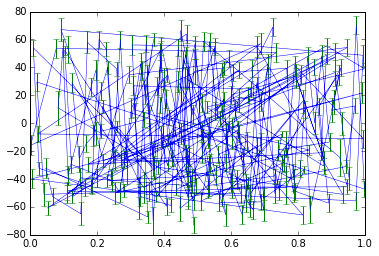

In [4]:
period_min=1.06930693#minimum period according the the output above 
#but i am nor sure why the picture below doesn't look like a sinusoidal function
phase_min=(time%period_min)/period_min
v = v[np.argsort(phase_min)] 
e = e[np.argsort(phase_min)]
plt.plot(phase_min,v,linewidth=0.5)
plt.errorbar(phase_min,v, yerr=e,fmt='none')

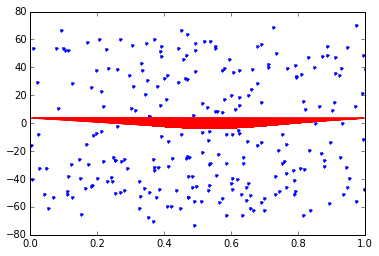

In [5]:
#fit the sinusoidal function,but it doesn't seem to be right
def ft(x, a, b):
    y = a*np.cos(2.*np.pi*x+b)
    return y
popt, pcov = curve_fit(ft, phase_min, v)
plt.plot(phase_min, v, '.')
plt.plot(phase_min, ft(phase_min, *popt), 'r-')

** HLudwig: I think you should have asked me in ordeer to make sense of the problem given. Nevertheless, I appreciate that you tried, and you worked out the other problem sets well. My general advice would be to talk more to your fellow students. This often helps a lot! **